# ECSE 415 Assignment 3, Question 2
### Alex Hale | 260672475 | November 5, 2019

## Motion

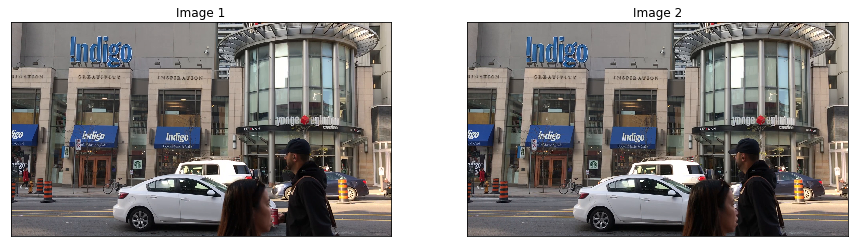

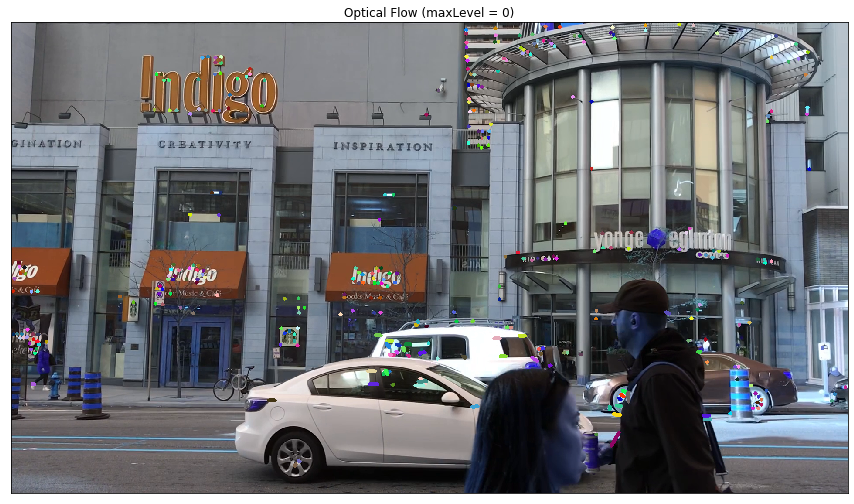

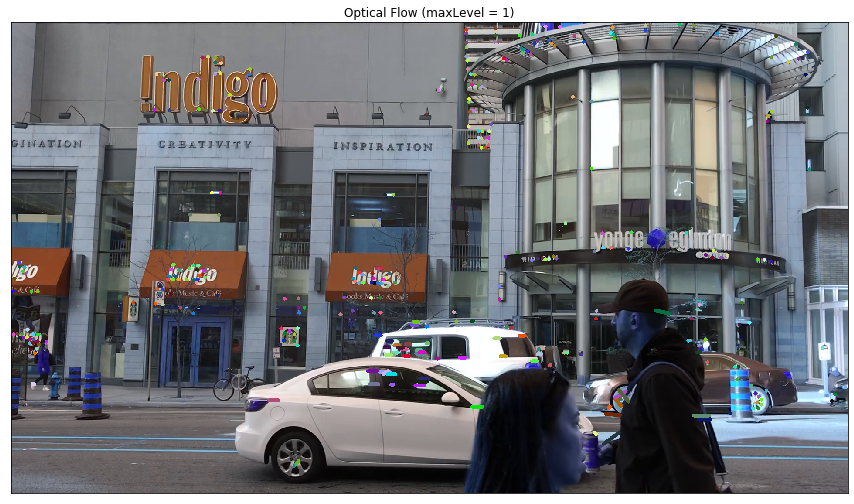

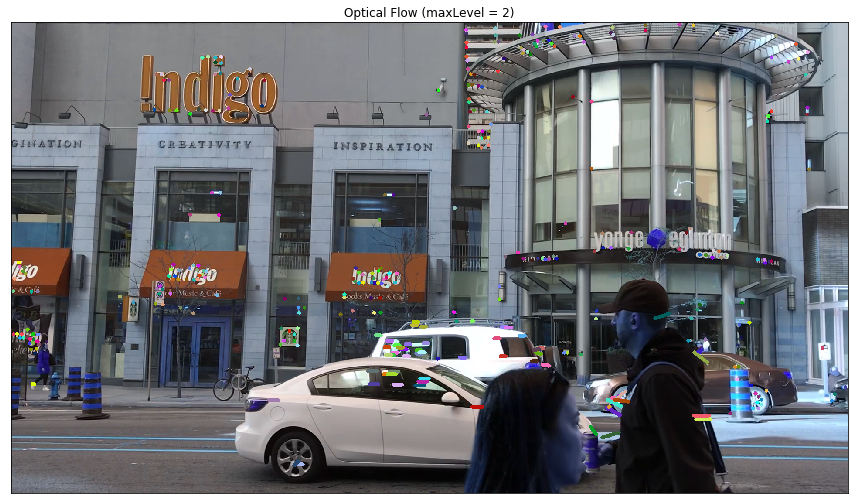

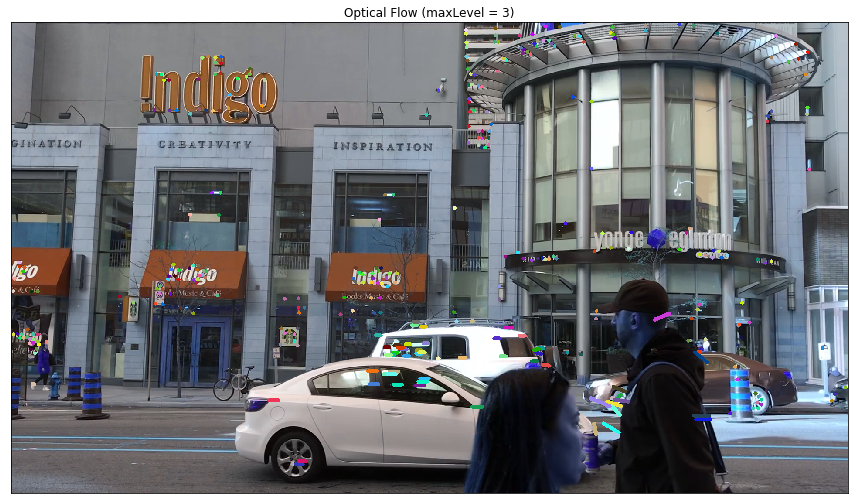

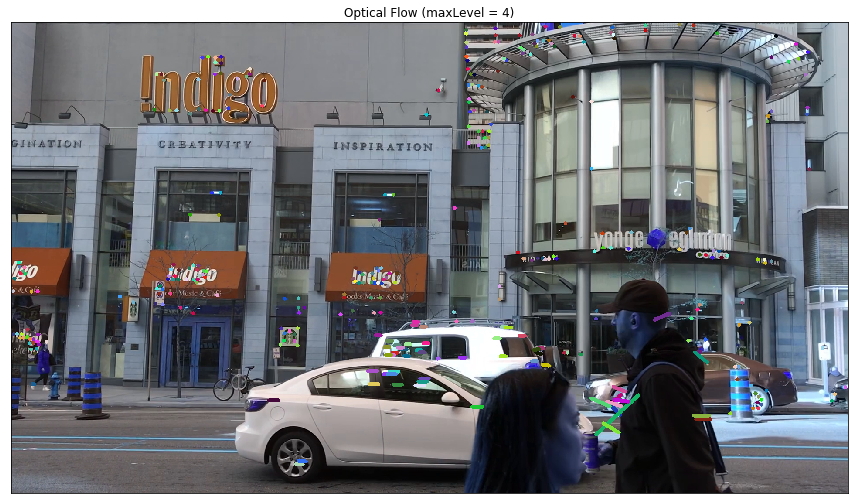

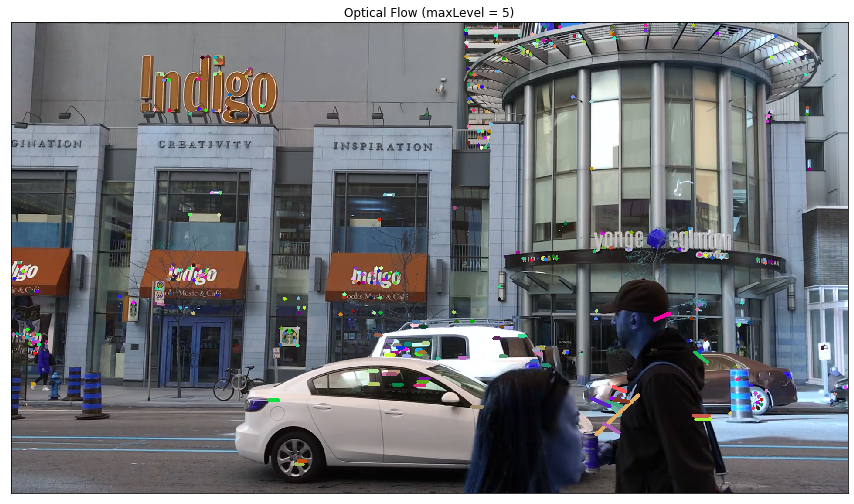

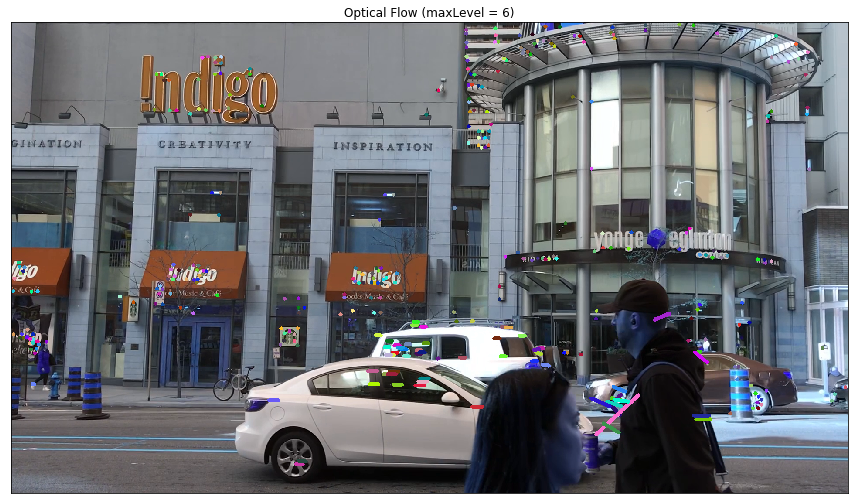

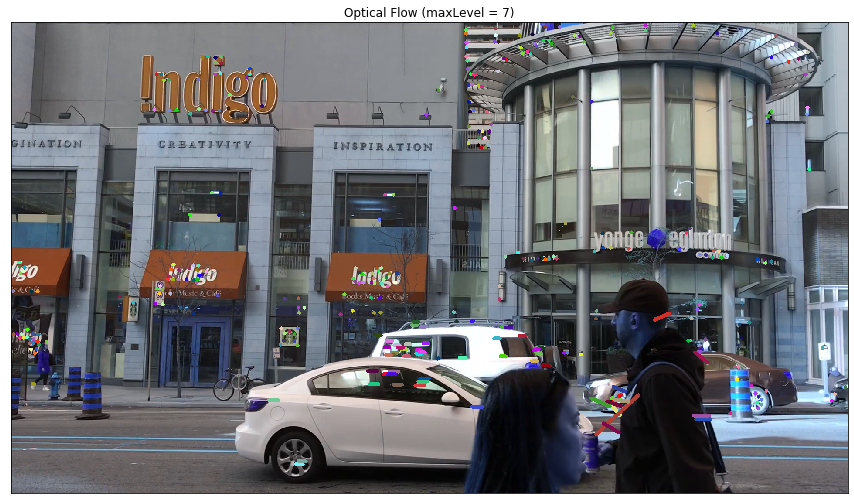

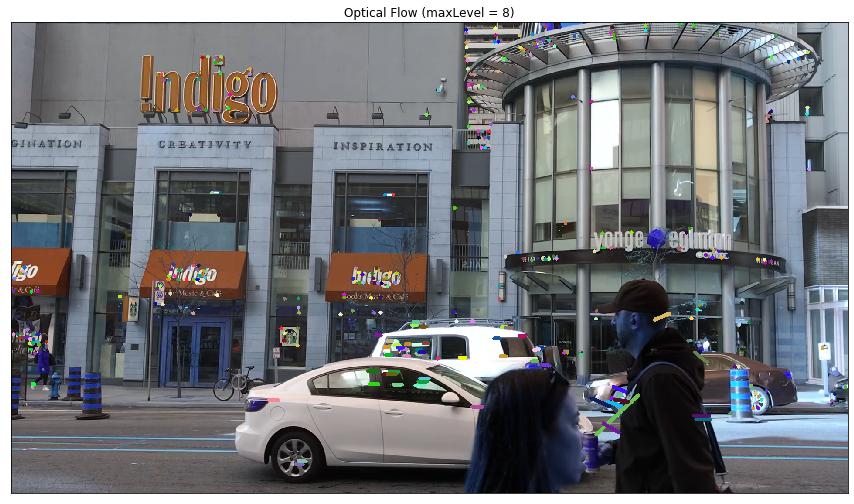

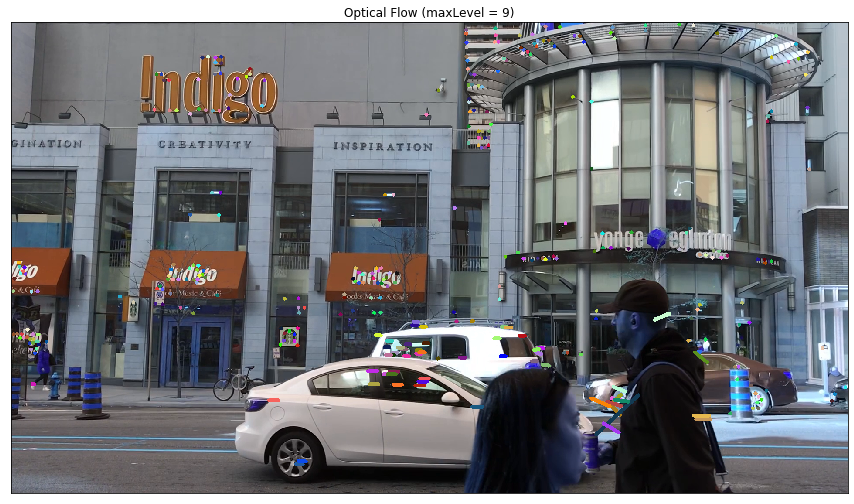

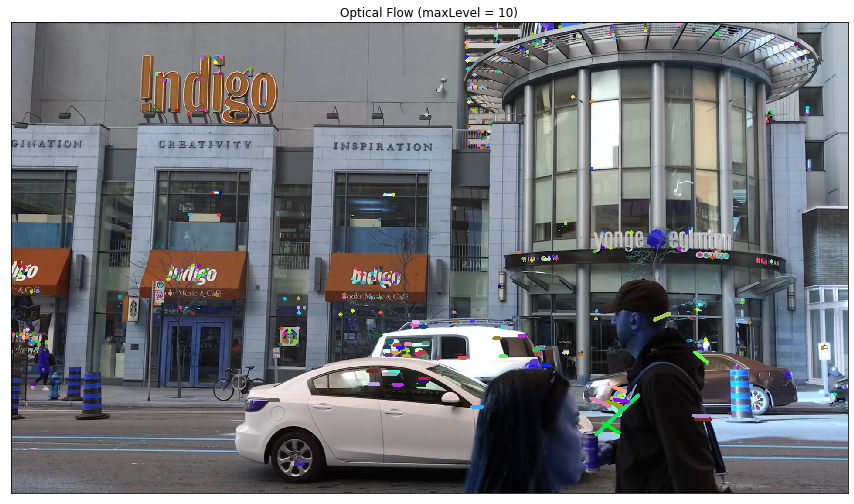

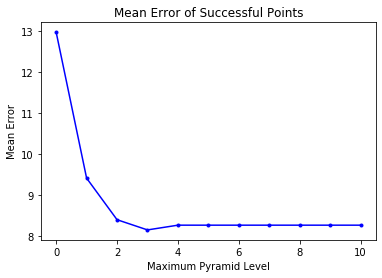

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load images
img1 = cv2.imread("frame1.png")
img2 = cv2.imread("frame2.png")
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Image 1"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Image 2"), plt.xticks([]), plt.yticks([])
plt.show()

# convert to grayscale
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# parameters for ShiTomasi corner detection
# TODO find optimal values for the parameters
feature_params = dict( maxCorners = 500,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# parameters for lucas kanade optical flow
# TODO find optimal values for the parameters
lk_params = dict( winSize = (15,15),
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                             10, 0.03))

# storage array for mean errors of successfully corresponded points
meanErrs = []

for m in range(0, 11):
    # find good corners in the first image
    p1 = cv2.goodFeaturesToTrack(img1_gray, **feature_params)

    # calculate optical flow
    p2, status, err = cv2.calcOpticalFlowPyrLK(img1_gray, img2_gray, p1, None, maxLevel = m, **lk_params)

    # select good points
    good_new = p2[status == 1]
    good_old = p1[status == 1]
    
    # calculate mean of error for successfully corresponded points
    successfulErr = err[status == 1]
    meanErrs.append(sum(successfulErr) / len(successfulErr))

    # create some random colors to use for drawing the flow lines
    color = np.random.randint(0, 255, (good_new.shape[0], 3))

    # clone the first image so we can draw on it
    clone = img1.copy()
    
    # draw the tracks
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        clone = cv2.line(clone, (a,b), (c,d), color[i].tolist(), 8)

    # display images
    plt.figure(figsize=(15,15))
    plt.imshow(clone)
    plt.title("Optical Flow (maxLevel = {})".format(m)), plt.xticks([]), plt.yticks([])
    plt.show()
    
plt.plot(range(0, 11), meanErrs[:], color='b', marker='.')
plt.ylabel('Mean Error'), plt.xlabel('Maximum Pyramid Level')
plt.title("Mean Error of Successful Points")
plt.show()

The quality of the optical flow results (as well as the mean error) increases dramatically when the maximum pyramid level increases from 0 to 3. However, after this initial improvement, the results plateau and do not improve any further.

TODO why is this the case?